<a href="https://colab.research.google.com/github/Tech-Prep-Mentor/Food-Recommendation-Data/blob/main/ingre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory data analysis
**Dataset:** [Food Recommender](https://www.kaggle.com/code/aayushmishra1512/food-recommender/input?select=RAW_interactions.csv)

**Google Drive:** [Food_Recommender](https://drive.google.com/drive/folders/1HBhTdqGAqAmeFThYoBopaAe0SPu0HQb1?usp=sharing)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import recipes dataset
recipes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Food_Recommender/food_dataset/RAW_recipes.csv')
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,9/16/2005,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,6/17/2002,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2/25/2005,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,4/14/2003,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,10/25/2002,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


There are null values in the columns 'name' and 'description'

In [5]:
recipes.nunique()

name              230185
id                231637
minutes              888
contributor_id     27926
submitted           5090
tags              209115
nutrition         229318
n_steps               94
steps             231074
description       222658
ingredients       230475
n_ingredients         41
dtype: int64

Some names and ingredients are repeated

In [6]:
# View rows with duplicated names
recipes[recipes.duplicated(subset=['name'], keep=False)].sort_values('name')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
846,10 bean soup,470575,180,1020526,12/26/2011,"['time-to-make', 'course', 'main-ingredient', ...","[228.0, 10.0, 38.0, 47.0, 42.0, 8.0, 6.0]",9,"['finely chop onion , red and green bell peppe...",we made this without the smoked turkey and ham...,"['beans', 'onion', 'red bell pepper', 'green b...",13
806,10 bean soup,348965,780,215956,1/11/2009,"['course', 'main-ingredient', 'soups-stews', '...","[63.1, 3.0, 10.0, 11.0, 6.0, 1.0, 3.0]",11,"['soak beans in water overnight', 'drain the b...","yes, another soup recipe! we really love a ho...","['10 bean soup mix', 'fat-free low-sodium chic...",14
1314,3 bean baked beans,313237,40,407338,7/11/2008,"['60-minutes-or-less', 'time-to-make', 'course...","[329.9, 26.0, 48.0, 39.0, 33.0, 31.0, 9.0]",10,"['fry bacon until crisp , reserving 2 teaspoon...","great for cookouts, family gatherings, potluck...","['bacon', 'ground beef', 'onion', 'tomato sauc...",12
1200,3 bean baked beans,187438,80,208455,9/24/2006,"['time-to-make', 'course', 'main-ingredient', ...","[574.8, 35.0, 134.0, 48.0, 46.0, 39.0, 23.0]",4,"['in a large bowl combine cooked bacon , hambu...",a wonderful bean dish that always gets gobbled...,"['bacon', 'hamburger', 'onion', 'kidney beans'...",11
1315,3 bean salad,258846,15,607801,10/13/2007,"['15-minutes-or-less', 'time-to-make', 'course...","[502.3, 44.0, 37.0, 41.0, 24.0, 19.0, 16.0]",6,"['in medium bowl combine mustard , vinegar and...",i got this recipe from one of rachel ray's coo...,"['cut green beans', 'dijon mustard', 'sugar', ...",9
...,...,...,...,...,...,...,...,...,...,...,...,...
231222,zucchini lime bread,181477,75,106506,8/12/2006,"['time-to-make', 'course', 'main-ingredient', ...","[3833.4, 280.0, 1237.0, 128.0, 99.0, 132.0, 17...",11,"['beat the oil and sugar until creamy', 'add e...","we receive several, sometimes many zucchini ev...","['vegetable oil', 'sugar', 'eggs', 'vanilla ex...",12
231263,zucchini oat bread,329709,95,403281,10/8/2008,"['time-to-make', 'course', 'preparation', 'for...","[218.6, 6.0, 76.0, 8.0, 8.0, 11.0, 13.0]",13,"['preheat oven to 350 degrees', 'coat a bread ...",from a magazine-a little healther than the rec...,"['sugar', 'cinnamon', 'flour', 'rolled oats', ...",12
231537,zucchini oat bread,292835,105,324390,3/19/2008,"['time-to-make', 'course', 'main-ingredient', ...","[4588.6, 226.0, 1501.0, 141.0, 178.0, 213.0, 2...",19,"['preheat oven to 350 degrees f', 'lightly coa...",the bh&g $400 winner of the bread and rolls ca...,"['nonstick cooking spray', 'sugar', 'ground ci...",15
231355,zucchini salsa canned,462992,2900,1403860,8/24/2011,"['time-to-make', 'course', 'main-ingredient', ...","[64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]",27,['day one: in a large bowl or stainless pan co...,this is a delicious salsa recipe that my siste...,"['zucchini', 'sweet white onions', 'green bell...",17


In [7]:
# View rows with duplicated names
recipes[recipes.duplicated(subset=['ingredients'], keep=False)].sort_values('ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
75642,easy chicken cheese enchiladas,335140,50,535633,11/4/2008,"['60-minutes-or-less', 'time-to-make', 'course...","[312.4, 24.0, 9.0, 38.0, 38.0, 32.0, 7.0]",9,"['stir the soup , cour cream , picante sauce a...",i made this the other night and it was so good.,"[""campbell's cream of chicken soup"", 'sour cre...",9
34394,campbell s creamy chicken enchiladas,366391,70,1240814,4/17/2009,"['time-to-make', 'course', 'main-ingredient', ...","[277.9, 23.0, 7.0, 28.0, 29.0, 35.0, 7.0]",9,"['preheat oven to 350 degrees', 'stir the soup...","i normally don't like enchiladas, but i could ...","[""campbell's cream of chicken soup"", 'sour cre...",9
75510,easy cheesy chicken enchiladas,418484,55,1582490,3/30/2010,"['weeknight', '60-minutes-or-less', 'time-to-m...","[623.3, 47.0, 25.0, 80.0, 76.0, 62.0, 15.0]",18,"['1', 'heat the oven to 350f stir the soup , s...","this is one of my favorite dishes,so easy to m...","[""campbell's cream of chicken soup"", 'sour cre...",9
38377,champagne mustard,250034,6,572039,8/31/2007,"['15-minutes-or-less', 'time-to-make', 'course...","[534.8, 24.0, 327.0, 3.0, 29.0, 12.0, 29.0]",7,"['mix mustard and sugar', 'add the eggs one at...",i love mustard and this one is really good. bo...,"[""coleman's dry mustard"", 'sugar', 'eggs', 'ch...",4
38378,champagne mustard sauce,387898,13,343044,8/31/2009,"['15-minutes-or-less', 'time-to-make', 'course...","[711.6, 31.0, 414.0, 4.0, 41.0, 14.0, 38.0]",6,['mix together the dry mustard and sugar till ...,this sauce has a great flavor for almost any m...,"[""coleman's dry mustard"", 'sugar', 'eggs', 'ch...",4
...,...,...,...,...,...,...,...,...,...,...,...,...
127601,luscious lemon poke cake,145782,55,74652,11/20/2005,"['60-minutes-or-less', 'time-to-make', 'course...","[400.8, 24.0, 154.0, 17.0, 8.0, 12.0, 20.0]",9,"['preheat oven to 350 degrees f', 'grease and ...",we love lemon desserts and this is so fantasti...,"['yellow cake mix', 'instant lemon pudding mix...",7
115455,johnney cornbread,160234,55,101391,3/16/2006,"['60-minutes-or-less', 'time-to-make', 'course...","[440.8, 24.0, 74.0, 25.0, 16.0, 34.0, 22.0]",5,"['preheat oven to 400 degrees', 'mix the cake ...","this recipe is really close to my heart, losin...","['yellow cornmeal', 'all-purpose flour', 'baki...",7
213703,tippins like cornbread,100504,40,22015,9/23/2004,"['60-minutes-or-less', 'time-to-make', 'course...","[440.8, 24.0, 74.0, 25.0, 16.0, 34.0, 22.0]",5,"['preheat oven to 400 degrees', 'mix cake mix ...",this is posted in response to a request. tippi...,"['yellow cornmeal', 'all-purpose flour', 'baki...",7
85751,four cheese baked ziti,466776,65,37779,10/27/2011,"['time-to-make', 'course', 'main-ingredient', ...","[375.0, 27.0, 9.0, 16.0, 43.0, 52.0, 10.0]",10,"['cook pasta according to package directions',...",taste of home,"['ziti pasta', 'alfredo sauce', 'sour cream', ...",9


## Data cleaning

In [8]:
# Replace NaN recipe name with Unamed
recipes['name'] = recipes['name'].fillna('Unnamed')
recipes.rename(columns={'minutes': 'time'}, inplace=True)

# # Drop columns that are not needed
# recipes.drop(columns=['contributor_id', 'submitted', 'tags', 'steps', 'description'], inplace=True)

recipes.isna().sum()

name                 0
id                   0
time                 0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [9]:
# Get nutrition information from table description
nutritions = ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']

# Split nutrition into different values columns
recipes[[nu for nu in nutritions]] = recipes.nutrition.str.split(",",expand=True)
recipes.drop(columns=['nutrition'], inplace=True)

# Since the nutrition column is a string, we need to remove the characters and convert it to float
for nu in nutritions:
    recipes[nu] = recipes[nu].str.extract('(\d+.\d+)', expand=False).astype(float) # Extract number value

In [10]:
recipes.head()

,name,id,time,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,9/16/2005,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,6/17/2002,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2/25/2005,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,4/14/2003,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,10/25/2002,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [11]:
# Replace time < 15 to 15
recipes['time'] = np.where(recipes['time'] < 15, 15, recipes['time'])

# Divide cooking time into days and hours
recipes['hours'] = recipes['time']//60
recipes['days'] = recipes['hours']//24
recipes['hours'] = recipes['hours']%24
recipes['minutes'] = recipes['time']%60
# recipes.drop(columns=['time'], inplace=True)
recipes.sort_values('time').head()

,name,id,time,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,hours,days,minutes
115818,julie s instant breakfast,247451,15,337963,8/19/2007,"['15-minutes-or-less', 'time-to-make', 'course...",2,['slice banana and put all ingredients into th...,the perfect breakfast when you still have a ch...,"['milk', 'instant breakfast drink mix', 'banan...",...,396.5,25.0,130.0,9.0,25.0,30.0,17.0,0,0,15
36013,caramelized pineapple,438440,15,963956,10/1/2010,"['15-minutes-or-less', 'time-to-make', 'course...",10,['melt the butter in a medium to large saute p...,"so simple, yet so delicious. doesn't require m...","['butter', 'brown sugar', 'fresh pineapple']",...,103.2,8.0,53.0,2.0,0.0,18.0,4.0,0,0,15
125314,lobster or crab omelet,503222,15,542159,7/6/2013,"['15-minutes-or-less', 'time-to-make', 'course...",4,['beat the eggs and cook in an omelet pan over...,a bayou breakfast recipe for zwt 9 from a web ...,"['eggs', 'onion', 'butter', 'celery', 'lobsters']",...,494.8,64.0,5.0,20.0,51.0,104.0,0.0,0,0,15
125309,lobster newberg,178725,15,329251,7/21/2006,"['15-minutes-or-less', 'time-to-make', 'course...",9,['saute green onion in butter in a large sauce...,"my husband loves lobster, i hate it. i make it...","['green onions', 'butter', 'all-purpose flour'...",...,343.9,35.0,1.0,17.0,46.0,69.0,3.0,0,0,15
125274,lobster mango sandwiches,189302,15,27783,10/5/2006,"['15-minutes-or-less', 'time-to-make', 'course...",7,"['brush honey over pancetta slices , heat a sk...","clipped from gourmet magazine's ""you aked for ...","['pancetta', 'honey', 'vegetable oil', 'cooked...",...,429.4,16.0,84.0,35.0,48.0,9.0,21.0,0,0,15


In [12]:
def clean_ingredients(ingredients):
    # Remove brackets and quotes
    ingredients = ingredients.replace('[', '').replace(']', '').replace("'", '')
    return ingredients

# Apply the cleaning function to 'ingredients' column
recipes['ingredients_cleaned'] = recipes['ingredients'].apply(clean_ingredients)

# Save list of all ingredients and its recipe name in a new dataframe
recipes_ingredients = recipes[['name', 'ingredients_cleaned', 'days', 'hours', 'minutes']]
recipes_ingredients = recipes_ingredients.explode('ingredients_cleaned')
recipes_ingredients.reset_index(drop=True, inplace=True)
recipes_ingredients.to_csv('../modelling.csv', index=False)

## Visualization

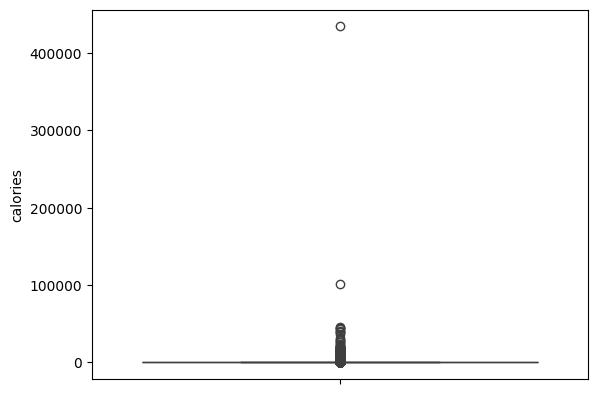

In [13]:
#to see the outliers in the initial dataset

sns.boxplot(recipes['calories'])
ylabel = 'calories'


In [14]:
upper_limit = recipes['calories'].mean() + 3*recipes['calories'].std()
lower_limit = recipes['calories'].mean() - 3*recipes['calories'].std()
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)

upper limit:  4043.0765473685933
lower limit:  -3095.191698229639


In [15]:
#find the outliers
recipes.loc[(recipes['calories'] > upper_limit) | (recipes['calories'] < lower_limit)]

,name,id,time,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,total fat,sugar,sodium,protein,saturated fat,carbohydrates,hours,days,minutes,ingredients_cleaned
8,bananas 4 ice cream pie,70971,180,102353,9/10/2003,"['weeknight', 'time-to-make', 'course', 'main-...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",...,254.0,1306.0,111.0,127.0,431.0,220.0,3,0,0,"chocolate sandwich style cookies, chocolate sy..."
47,jeanne s style birthday cake,83025,230,116315,2/4/2004,"['time-to-make', 'course', 'preparation', 'occ...",25,"['to prepare base , cut shortening into dry in...",a bakery in winnipeg is famous for this specia...,"['shortening', 'icing sugar', 'vanilla', 'all-...",...,516.0,1196.0,135.0,110.0,615.0,188.0,3,0,50,"shortening, icing sugar, vanilla, all-purpose ..."
94,symphony brownies,44895,45,51224,10/29/2002,"['60-minutes-or-less', 'time-to-make', 'course...",10,"['preheat oven to 350 degrees , or 325 degrees...",a,"['betty crocker fudge brownie mix', 'eggs', 'w...",...,470.0,1941.0,87.0,140.0,443.0,226.0,0,0,45,"betty crocker fudge brownie mix, eggs, water, ..."
96,the best chocolate chip cheesecake ever,62368,90,82367,5/17/2003,"['time-to-make', 'course', 'preparation', 'des...",12,"['preheat oven to 300', 'combine cookie crumbs...",i wrote this recipe down once while visiting a...,"['oreo cookie crumbs', 'butter', 'cream cheese...",...,653.0,1772.0,149.0,228.0,1218.0,155.0,1,0,30,"oreo cookie crumbs, butter, cream cheese, swee..."
129,250 00 chocolate chip cookies,118843,20,145599,4/24/2005,"['30-minutes-or-less', 'time-to-make', 'course...",3,['mix all ingredients together just until blen...,these are great! the perfect name for them!,"['butter', 'white sugar', 'brown sugar', 'eggs...",...,427.0,1630.0,159.0,163.0,656.0,224.0,0,0,20,"butter, white sugar, brown sugar, eggs, vanill..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231204,zucchini jam,70796,26,17803,9/8/2003,"['30-minutes-or-less', 'time-to-make', 'course...",6,['boil the zucchini and sugar for 10 to 15 min...,if you are like me you look for anyway to use ...,"['zucchini', 'sugar', 'lemon juice', 'crushed ...",...,4.0,4877.0,3.0,18.0,3.0,410.0,0,0,26,"zucchini, sugar, lemon juice, crushed pineappl..."
231266,zucchini oatmeal bread,406369,90,226863,1/2/2010,"['weeknight', 'time-to-make', 'course', 'main-...",11,['combine the first 8 ingredients in a large m...,yummy zucchini bread made a little more health...,"['all-purpose flour', 'quick-cooking oats', 'b...",...,404.0,885.0,127.0,155.0,173.0,161.0,1,0,30,"all-purpose flour, quick-cooking oats, baking ..."
231377,zucchini spice bundt cake,505267,80,2930834,8/5/2013,"['time-to-make', 'course', 'main-ingredient', ...",14,"['preheat oven to 350 degrees', 'in large glas...","a moist, dense spicy cake--similar to carrot c...","['eggs', 'vegetable oil', 'white sugar', 'real...",...,481.0,1647.0,219.0,151.0,204.0,232.0,1,0,20,"eggs, vegetable oil, white sugar, real vanilla..."
231537,zucchini oat bread,292835,105,324390,3/19/2008,"['time-to-make', 'course', 'main-ingredient', ...",19,"['preheat oven to 350 degrees f', 'lightly coa...",the bh&g $400 winner of the bread and rolls ca...,"['nonstick cooking spray', 'sugar', 'ground ci...",...,226.0,1501.0,141.0,178.0,213.0,253.0,1,0,45,"nonstick cooking spray, sugar, ground cinnamon..."


<Axes: ylabel='calories'>

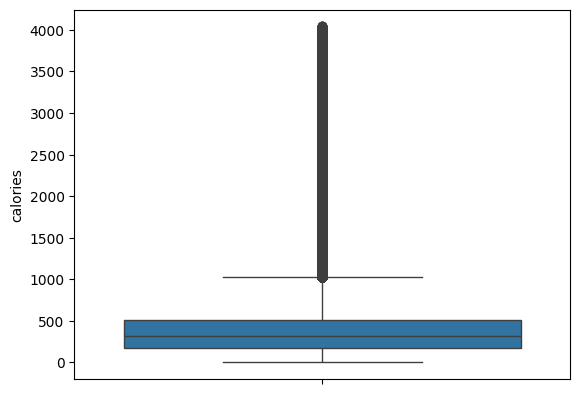

In [16]:
#trimming - delete the outlier data

recipes = recipes.loc[(recipes['calories'] < upper_limit) & (recipes['calories'] > lower_limit)]

sns.boxplot(recipes['calories'])


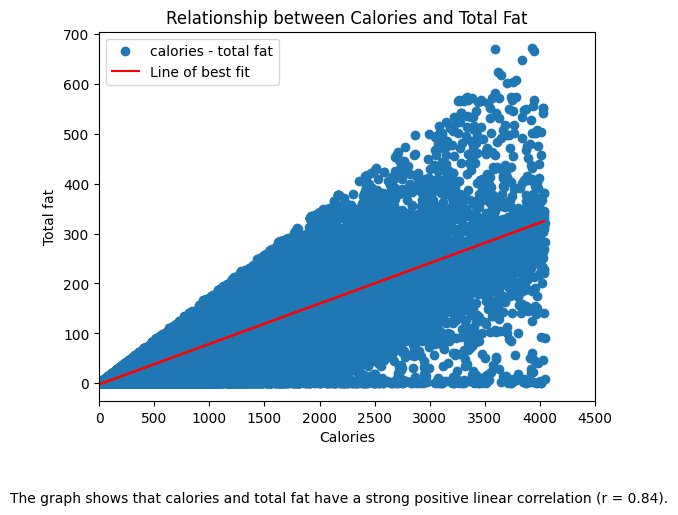

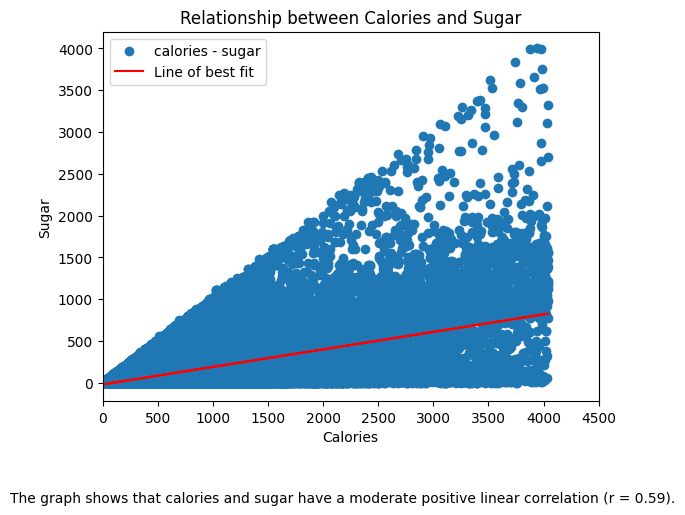

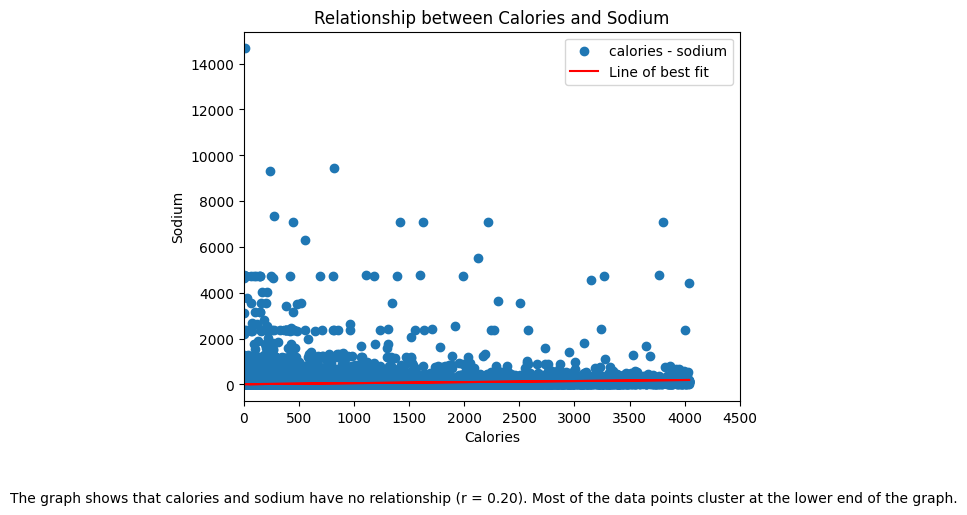

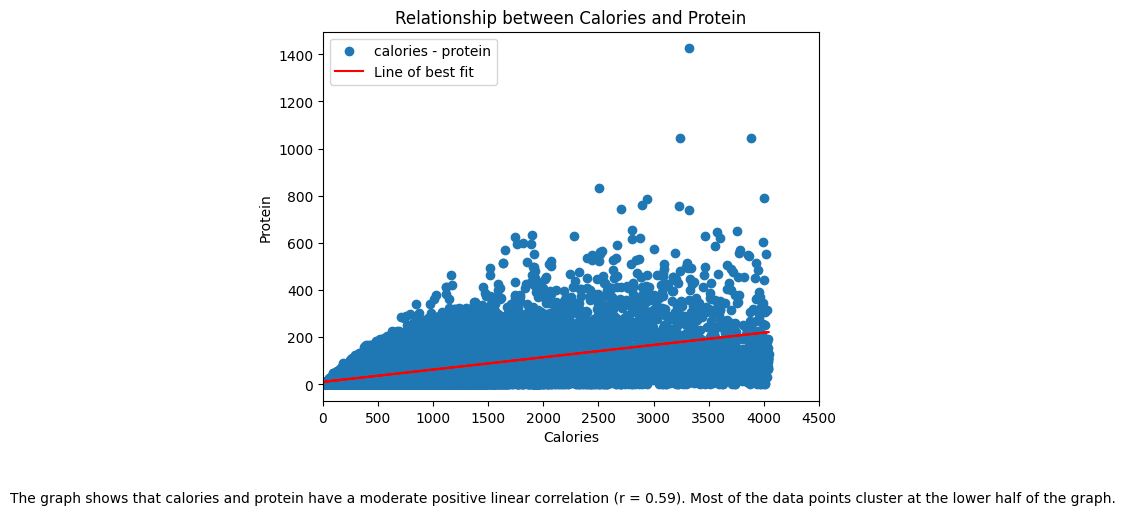

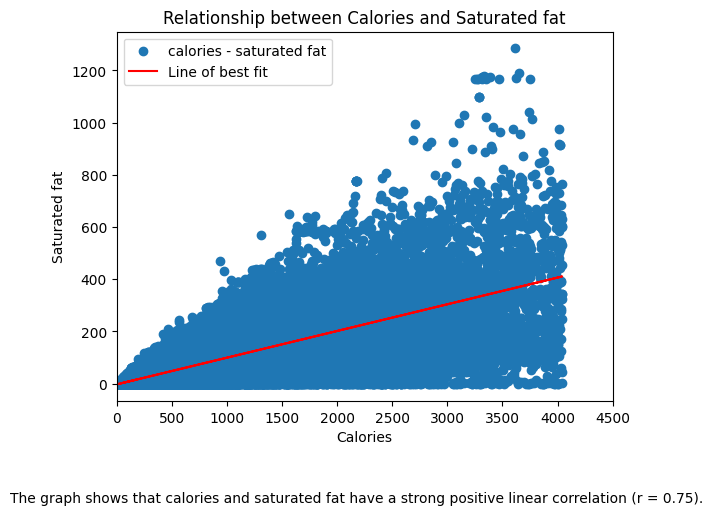

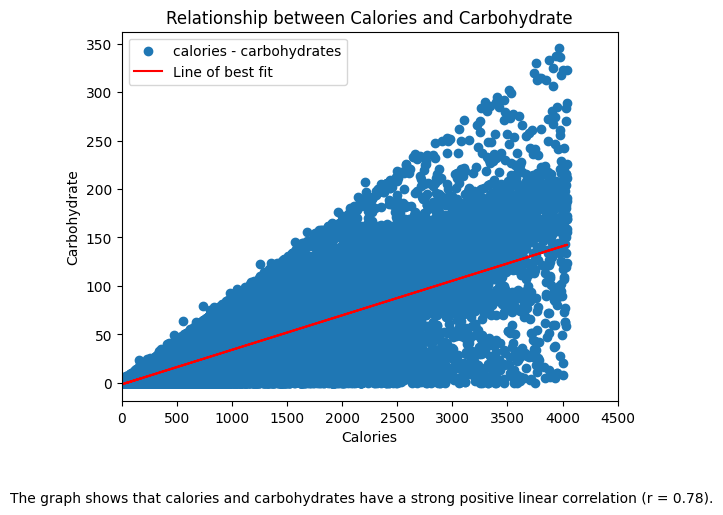

In [17]:
#Sample Datasets

calories_data = recipes['calories']
tfat_data = recipes['total fat']

# Plotting
plt.scatter(calories_data, tfat_data, label='calories - total fat')

# Setting the y-axis range
plt.xlim(0, 4500)

# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Total fat')
plt.title('Relationship between Calories and Total Fat')

#Adding line of best fit
coefficients = np.polyfit(calories_data, tfat_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and total fat have a strong positive linear correlation (r = 0.84).', ha='center', fontsize=10)

# Adding a legend
plt.legend()


# Displaying the plot
plt.show()
#-------------------------------------------------

#Sample Datasets

calories_data = recipes['calories']
sugar_data = recipes['sugar']

# Plotting
plt.scatter(calories_data, sugar_data, label='calories - sugar')

# Setting the x-axis range
plt.xlim(0, 4500)


# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Sugar')
plt.title('Relationship between Calories and Sugar')

#Adding line of best fit
coefficients = np.polyfit(calories_data, sugar_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and sugar have a moderate positive linear correlation (r = 0.59).', ha='center', fontsize=10)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

#-------------------------------------------------

#Sample Datasets

calories_data = recipes['calories']
sod_data = recipes['sodium']

# Plotting
plt.scatter(calories_data, sod_data, label='calories - sodium')

# Setting the x-axis range
plt.xlim(0, 4500)

# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Sodium')
plt.title('Relationship between Calories and Sodium')

#Adding line of best fit
coefficients = np.polyfit(calories_data, sod_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and sodium have no relationship (r = 0.20). Most of the data points cluster at the lower end of the graph.', ha='center', fontsize=10)


# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

#-------------------------------------------------

#Sample Datasets

calories_data = recipes['calories']
protein_data = recipes['protein']

# Plotting
plt.scatter(calories_data, protein_data, label='calories - protein')

# Setting the x-axis range
plt.xlim(0, 4500)

# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Relationship between Calories and Protein')

#Adding line of best fit
coefficients = np.polyfit(calories_data, protein_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and protein have a moderate positive linear correlation (r = 0.59). Most of the data points cluster at the lower half of the graph.', ha='center', fontsize=10)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

#-------------------------------------------------

#Sample Datasets

calories_data = recipes['calories']
sfat_data = recipes['saturated fat']

# Plotting
plt.scatter(calories_data, sfat_data, label='calories - saturated fat')

# Setting the x-axis range
plt.xlim(0, 4500)

# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Saturated fat')
plt.title('Relationship between Calories and Saturated fat')

#Adding line of best fit
coefficients = np.polyfit(calories_data, sfat_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and saturated fat have a strong positive linear correlation (r = 0.75).', ha='center', fontsize=10)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

#-------------------------------------------------

#Sample Datasets

calories_data = recipes['calories']
carb_data = recipes['carbohydrates']

# Plotting
plt.scatter(calories_data, carb_data, label='calories - carbohydrates')

# Setting the x-axis range
plt.xlim(0, 4500)

# Adding labels and title
plt.xlabel('Calories')
plt.ylabel('Carbohydrate')
plt.title('Relationship between Calories and Carbohydrate')

#Adding line of best fit
coefficients = np.polyfit(calories_data, carb_data, 1)  # 1 means a linear fit (line)
slope, intercept = coefficients

y_fit = slope * calories_data + intercept

plt.plot(calories_data, y_fit, color='red', label='Line of best fit')

# Add text under the graph
plt.figtext(0.5, -0.1, 'The graph shows that calories and carbohydrates have a strong positive linear correlation (r = 0.78).', ha='center', fontsize=10)

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()








## Data processing

Label encode ingredients for training

In [18]:
recipes['calories'].corr(recipes['total fat'])

0.843855327681878

:There is quite a strong linear correlation between calories and total fat

In [19]:
recipes['calories'].corr(recipes['sugar'])

0.5912287132718935

In [20]:
recipes['calories'].corr(recipes['sodium'])

0.19774390901357136

In [21]:
recipes['calories'].corr(recipes['protein'])

0.5943251593848651

Linear relationship between calories and sugar/sodium/protein isn't as determining. There isn't even any linear relationship between calories and sodium.

In [22]:
recipes['calories'].corr(recipes['saturated fat'])

0.752975004156505

In [23]:
recipes['calories'].corr(recipes['carbohydrates'])

0.7846428738080115

The correlation beteween calories and sat fat/carb is also quite strong.

In [24]:
recipes.head()

,name,id,time,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,total fat,sugar,sodium,protein,saturated fat,carbohydrates,hours,days,minutes,ingredients_cleaned
0,arriba baked winter squash mexican style,137739,55,47892,9/16/2005,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,0.0,13.0,0.0,2.0,0.0,4.0,0,0,55,"winter squash, mexican seasoning, mixed spice,..."
1,a bit different breakfast pizza,31490,30,26278,6/17/2002,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,18.0,0.0,17.0,22.0,35.0,1.0,0,0,30,"prepared pizza crust, sausage patty, eggs, mil..."
2,all in the kitchen chili,112140,130,196586,2/25/2005,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,22.0,32.0,48.0,39.0,27.0,5.0,2,0,10,"ground beef, yellow onions, diced tomatoes, to..."
3,alouette potatoes,59389,45,68585,4/14/2003,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,17.0,10.0,2.0,14.0,8.0,20.0,0,0,45,"spreadable cheese with garlic and herbs, new p..."
4,amish tomato ketchup for canning,44061,190,41706,10/25/2002,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,1.0,337.0,23.0,3.0,0.0,28.0,3,0,10,"tomato juice, apple cider vinegar, sugar, salt..."
